In [552]:
#IMPORT LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#READ IN BOTH csv FILES

geo_data = pd.read_csv('geo_data.csv.bz2')
mission_data = pd.read_csv('mission_data.csv.bz2')

#MERGE THE TWO DATAFRAMES INTO ONE

df = pd.merge(left=geo_data, right=mission_data)

In [553]:
#JOINED DATAFRAME LOOKS LIKE IT MERGED WITHOUT ERRORS

df.head(10)

,country_cd,timezone,robotid,datetime,nmssn,runm,chrgm,pausem,outcome
0,SE,Europe/Stockholm,T29NF13ZIYISNF79,2017-08-10 19:15:38,16,26,0,5,ok
1,SE,Europe/Stockholm,T29NF13ZIYISNF79,2017-08-10 03:09:12,17,63,0,14,ok
2,SE,Europe/Stockholm,T29NF13ZIYISNF79,2017-08-11 17:05:58,18,49,0,11,bat
3,SE,Europe/Stockholm,T29NF13ZIYISNF79,2017-08-12 02:09:54,19,39,0,8,ok
4,SE,Europe/Stockholm,T29NF13ZIYISNF79,2017-08-12 16:38:55,21,38,0,8,ok
5,SE,Europe/Stockholm,T29NF13ZIYISNF79,2017-08-13 06:15:15,22,85,0,0,cncl
6,SE,Europe/Stockholm,T29NF13ZIYISNF79,2017-08-14 14:32:25,23,45,0,10,ok
7,SE,Europe/Stockholm,T29NF13ZIYISNF79,2017-08-14 07:31:50,24,67,0,0,cncl
8,SE,Europe/Stockholm,T29NF13ZIYISNF79,2017-08-14 01:28:44,25,30,9,8,cncl
9,SE,Europe/Stockholm,T29NF13ZIYISNF79,2017-08-14 22:19:08,27,74,0,0,ok


In [554]:
#OBSERVE STATISTICS FOR THE NUMERICAL DATA. HOWEVER, THIS DATA DOES NOT TELL US MUCH
df.describe()

,nmssn,runm,chrgm,pausem
count,367679.000000,367679.000000,367679.000000,367679.000000
mean,73.258984,48.906383,5.152772,6.231351
std,35.749076,29.819507,8.364238,8.202553
min,1.000000,0.000000,0.000000,0.000000
25%,47.000000,27.000000,0.000000,0.000000
50%,71.000000,47.000000,0.000000,1.000000
75%,95.000000,70.000000,11.000000,12.000000
max,248.000000,144.000000,30.000000,40.000000


In [555]:
#OBSERVE THE NUMBER OF COUNTRIES AND TIMEZONES

#len(pd.unique(df['timezone']))
len(pd.unique(df['country_cd']))

85

In [556]:
#CURRENT TIMEZONE COLUMN DOESN'T TELL US MUCH, SPLIT THE GEOGRAPHICAL REGION FROM THE CITY
#THE GEOGRAPHICAL REGION WILL COME IN HANDY

split_tz = df['timezone'].str.split('/', expand=True)


In [557]:
#CREATE SEPERATE REGION COLUMNS FOR REGIONSAND CITIES

df['region'] = split_tz[0]
df['city'] = split_tz[1]
df.drop(columns=['timezone'], inplace=True)
df.head()

,country_cd,robotid,datetime,nmssn,runm,chrgm,pausem,outcome,region,city
0,SE,T29NF13ZIYISNF79,2017-08-10 19:15:38,16,26,0,5,ok,Europe,Stockholm
1,SE,T29NF13ZIYISNF79,2017-08-10 03:09:12,17,63,0,14,ok,Europe,Stockholm
2,SE,T29NF13ZIYISNF79,2017-08-11 17:05:58,18,49,0,11,bat,Europe,Stockholm
3,SE,T29NF13ZIYISNF79,2017-08-12 02:09:54,19,39,0,8,ok,Europe,Stockholm
4,SE,T29NF13ZIYISNF79,2017-08-12 16:38:55,21,38,0,8,ok,Europe,Stockholm


In [558]:
#THE FOLLOWING ARE ALL OF THE REGIONS WHERE ROBOTS REPORTED BACK DATA

df['region'].unique()

array(['Europe', 'Asia', 'Australia', 'America', 'Pacific', 'Atlantic',
       'Africa'], dtype=object)

In [559]:
#I AM CURIOUS TO SEE HOW ROBOT USE COMPARES ACROSS THE WORLD REGIONS
#SINCE THERE ARE 85 DIFFERENT COUNTRIES THAT USE ROBOTS, IT IS EASIER TO COMPARE ROBOT USAGE ACROSS THE BROADER REGIONS
#BELOW, I GROUP THE REGIONS TOGETHER AND CALCULATE THE MEAN VALUES. 
#I WILL BE LOOKING AT THE NUMBER OF MISSIONS RUN (nmssn) IN EACH REGION, SO I WILL DROP THE OTHER COLUMNS FOR NOW
#I CONVERT THE DATAFRAME INTO A LIST OF VALUES TO PLOT LATER ON

df_grouped_M = df.groupby('region').mean()
df_nmssn = df_grouped_M.drop(columns = ['runm', 'chrgm', 'pausem'])
list_nmssn = df_nmssn['nmssn'].values.tolist()
df_nmssn.sort_values('nmssn', ascending = False)

#AS SEEN BELOW, THE ATLANTIC REGION AVERAGES MORE MISSIONS PER ROBOT
#THIS MAY HAVE SALES/SUPPLY CHAIN IMPLICATIONS AS IT APPEARS PEOPLE IN THAT REGION EITHER BUY NEW ROBOTS LESS FREQUENTLY
#OR THE ROBOTS HAVE A LONGER AVERAGE LIFE
#IN AFRICA, THE NUMBER OF MISSIONS PER ROBOT IS LOWER ON AVERAGE BY A GOOD AMOUNT. DUE TO THE GEOGRAPHIC AREA, IT MAY BE 
#DUE TO iRobot NOT BEING PRESENT IN THE AFRICA REGION FOR A LONG PERIOD

,nmssn
region,
Atlantic,80.198745
Pacific,75.666667
Europe,73.498713
Asia,73.300521
America,72.206103
Australia,69.872258
Africa,63.309353


In [560]:
#ABOVE I GATHERED DATA ON THE AVERAGE NUMBER OF MISSIONS RUN IN EACH REGION
#NOW I WANT TO COMPARE THE AMOUNT OF TIME THE MACHINES SPEND CLEANING IN EACH REGION (runm)

df_runm = df_grouped_M.drop(columns = ['nmssn', 'chrgm', 'pausem'])
list_runm = df_runm['runm'].values.tolist()
df_runm.sort_values('runm', ascending = False)

#INTERESTINGLY, THE ATLANTIC REGION HAS THE SHORTEST AVERAGE CLEANING TIME FOR ROBOTS
#THIS IS LIKELY THE DRIVING FACTOR BEHIND THE HIGHER NUMBER OF MISSIONS PER ROBOT IN THE REGION


,runm
region,
Asia,49.484388
Australia,48.036129
Pacific,47.652893
America,47.621590
Europe,47.367066
Africa,46.733813
Atlantic,46.359833


In [561]:
#TO VISUALIZE THE CORRELATION BETWEEN BOTH FACTORS IN EACH REGION, I CREATED A SUBPLOT OF THE TWO BELOW

index = df_grouped_M.index
index = index.values.tolist()
nmssn_runm = pd.DataFrame({'Average Number of Missions' : list_nmssn,
                          'Average Run Time' : list_runm}, index = index)


(40.0, 51.95860730282155)

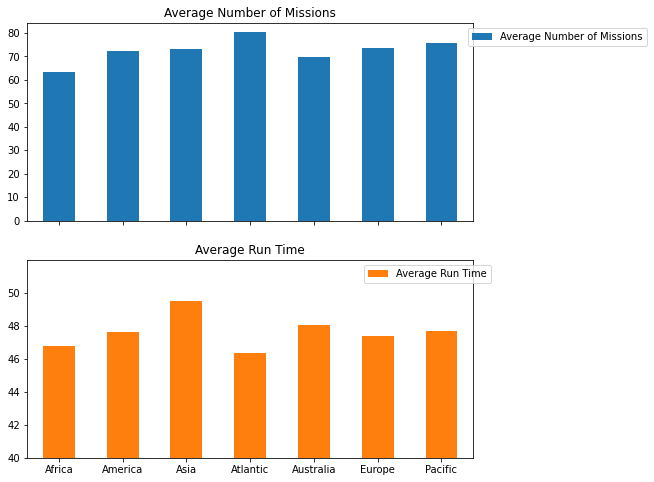

In [562]:

plot = nmssn_runm.plot.bar(rot=0, subplots=True, figsize = (8,8) )

plot[0].legend(bbox_to_anchor=(1.40, 1))  
plot[1].legend(bbox_to_anchor=(1.05, 1))
ymin, ymax = plt.ylim()

plt.ylim(ymin + 40 , ymax)

In [563]:
#I AM CURIOUS IF THERE ARE ANY OUTLIERS FOR THE DATA
#BELOW, I SHOW THE TOP 10 COUNTRIES WITH THE HIGHEST AVERAGE MISSIONS PER ROBOT
#AS WELL AS THE BOTTOM 10 COUNTRIES WITH THE LOWEST AVERAGE MISSION PER ROBOT

new_df = df.copy()
df_nmssn = new_df.drop(columns=['runm','chrgm','pausem'], inplace=True)
df_nmssn = new_df.groupby('country_cd').mean()
df_nmssn.sort_values('nmssn', ascending = False, inplace = True)
df_top10 = df_nmssn.head(10)
df_nmssn.sort_values('nmssn', ascending = True, inplace = True)
df_bottom10 = df_nmssn.head(10)

df_top10

#THERE IS A SIGNIFICANT OUTLIER COUNTRY WITH CODE (BY)

,nmssn
country_cd,
BY,106.107383
HK,96.906200
SR,96.369863
OM,92.025000
PA,91.769231
KH,90.422680
QA,89.240506
LV,88.298643
IE,87.079439


In [564]:
df_bottom10
#THERE ARE NOT ANY SIGNIFICANT OUTLIERS FOR THE BOTTOM 10

,nmssn
country_cd,
PH,30.384615
KZ,31.022222
LT,37.267857
EE,37.357143
SX,38.500000
CL,46.357143
KR,47.514925
BM,47.632353
BS,48.117647


In [565]:
#NOW I'M CURIOUS HOW THE ROBOT ACTIVITY DIFFERS IN EACH REGION. I WANT TO KNOW WHAT THE ROBOTS ARE DOING
#AS A PERCENTAGE OF THE TIME THE ROBOTS ARE ACTIVE
#BELOW I CALCULATE THE PERCENTAGE TIME FOR EACH COLUMN

df_grouped = df.groupby('region').sum()
fields = ['runm','chrgm','pausem']
df_grouped['total'] = df_grouped[fields].sum(axis=1)

df_grouped.drop(columns = ['nmssn'])

for i in fields:
    df_grouped['{}_Percent'.format(i)] = df_grouped[i] / df_grouped['total']

df_grouped.sort_values('runm_Percent', inplace=True)
df_grouped = df_grouped.drop(['nmssn','runm','chrgm','pausem','total'], axis = 1)
print(df_grouped)

           runm_Percent  chrgm_Percent  pausem_Percent
region                                                
Asia           0.789867       0.100964        0.109169
Pacific        0.869858       0.040657        0.089485
Atlantic       0.871857       0.041586        0.086556
Europe         0.872592       0.041260        0.086148
America        0.877012       0.035973        0.087015
Africa         0.877838       0.035270        0.086892
Australia      0.879673       0.036100        0.084227


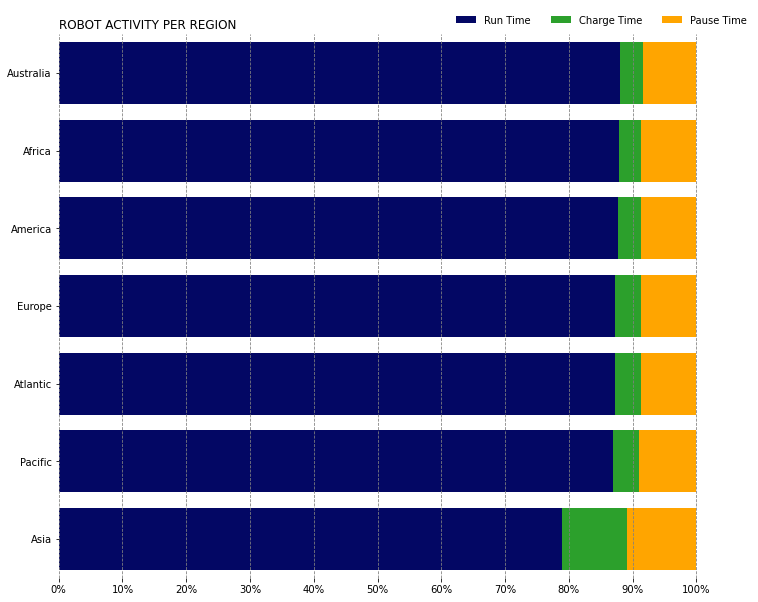

In [566]:
#BELOW IS THE PLOT OF ROBOT ACTIVITY IN EACH REGION AS A TOTAL PERCENTAGE
#IN ASIA, ROBOTS SPEND SIGNIFICANTLY MORE TIME CHARGING AND LESS TIME CLEANING THAN IN ALL OTHER REGIONS


labels = ['Run Time', 'Charge Time', 'Pause Time']
colors = ['#030764', '#2ca02c', '#FFA500']
title = 'ROBOT ACTIVITY PER REGION'
subtitle = ' '


def plot_stackedbar(df, labels, colors, title):
    fields = df.columns.tolist()
    
    fig, ax = plt.subplots(1, figsize=(12, 10))
    left = len(df) * [0]
    for idx, name in enumerate(fields):
        plt.barh(df.index, df[name], left = left, color=colors[idx])
        left = left + df[name]
        
    plt.title(title, loc='left')
    plt.text(0, ax.get_yticks()[-1] + 0.75, subtitle)

    plt.legend(labels, bbox_to_anchor=([0.58, 1, 0, 0]), ncol=4, frameon=False)

    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    xticks = np.arange(0,1.1,0.1)
    xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
    plt.xticks(xticks, xlabels)

    plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    ax.xaxis.grid(color='gray', linestyle='dashed')
    

plt.show()
    
plot_stackedbar(df_grouped, labels, colors, title)

In [431]:
#I COMPARED ROBOT ACTIVITY IN EACH REGION, BUT HOW DOES THE ROBOT MISSION OUTCOMES COMPARE?
#I CREATE AN OUTCOME COUNT FOR EACH COUNTRY FIRST TO SEE WHAT COUNTRIES HAVE THE GREATEST PERCENTAGE OF ROBOTS
#THAT GET STUCK WHILE CLEANING

outcome_count = df.groupby(['country_cd', 'outcome']).size().unstack(fill_value=0)
outcome_count.sort_values('stuck', ascending = False)
outcome_count['total'] = outcome_count.sum(axis=1)

fields = ['bat','cncl','ok', 'stuck']

for i in fields:
    outcome_count['{}_Percent'.format(i)] = outcome_count[i] / outcome_count['total']

outcome_count.sort_values('stuck_Percent', ascending = False, inplace=True)
outcome_count = outcome_count.drop(['bat','cncl','ok','stuck','total'], axis = 1)
top_stuck = outcome_count.head(10)
top_stuck

#AS SEEN BELOW, THE COUNTRY MD HAS ROBOTS THAT GET STUCK MORE OFTEN THAN THE OTHER COUNTRIES

outcome,bat_Percent,cncl_Percent,ok_Percent,stuck_Percent
country_cd,,,,
MD,0.000000,0.264706,0.529412,0.205882
QA,0.050633,0.240506,0.544304,0.164557
SA,0.026316,0.254386,0.578947,0.140351
TR,0.000000,0.217054,0.643411,0.139535
UY,0.027473,0.302198,0.532967,0.137363
CR,0.011364,0.181818,0.670455,0.136364
AG,0.125000,0.375000,0.375000,0.125000
PR,0.015267,0.259542,0.606870,0.118321
PA,0.000000,0.115385,0.769231,0.115385


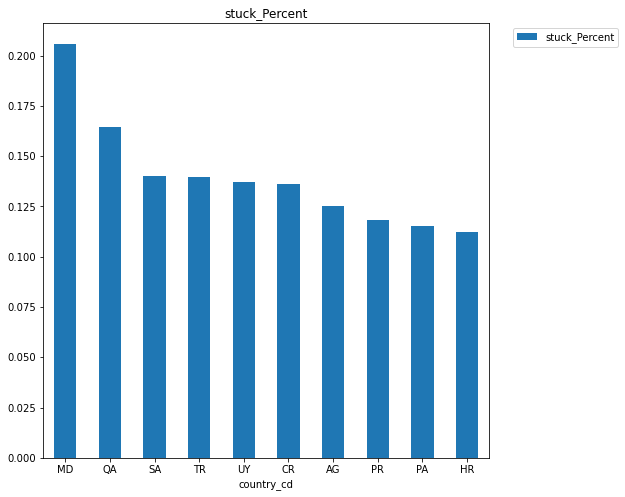

In [433]:
#PLOT THE PERCENTAGE STUCK BELOW FOR EACH COUNTRY

stuck_plot = top_stuck['stuck_Percent'].plot.bar(rot=0, subplots=True, figsize = (8,8) )
stuck_plot[0].legend(bbox_to_anchor=(1.3, 1))

In [436]:
#ABOVE I OBSERVED THE COUNTRIES WHOSE ROBOTS WERE STUCK THE MOST
#NOW I WANT TO SEE WHAT COUNTRIES' ROBOTS HAVE THE WORST BATTERY USAGE

outcome_count.sort_values('bat_Percent', ascending = False, inplace=True)
top_bat = outcome_count.head(10)
top_bat

#THE COUNTRIES BH AND AG HAVE THE MOST MISSIONS WHERE THE BATTERY RUNS LOW
#COUNTRY BH DOESN'T HAVE A SINGLE ROBOT THAT'S GOTTEN STUCK (!)
#THAT PROBABLY MEANS THE SAMPLE SIZE FOR THAT COUNTRY ISN'T VERY LARGE, SO THE BAT_PERCENT NUMBER MAY NOT BE SIGNIFICANT

outcome,bat_Percent,cncl_Percent,ok_Percent,stuck_Percent
country_cd,,,,
BH,0.125000,0.500000,0.375000,0.000000
AG,0.125000,0.375000,0.375000,0.125000
PH,0.076923,0.461538,0.461538,0.000000
JM,0.075000,0.325000,0.550000,0.050000
PS,0.073171,0.341463,0.585366,0.000000
QA,0.050633,0.240506,0.544304,0.164557
OM,0.050000,0.275000,0.575000,0.100000
NC,0.042857,0.385714,0.471429,0.100000
GU,0.040000,0.360000,0.600000,0.000000


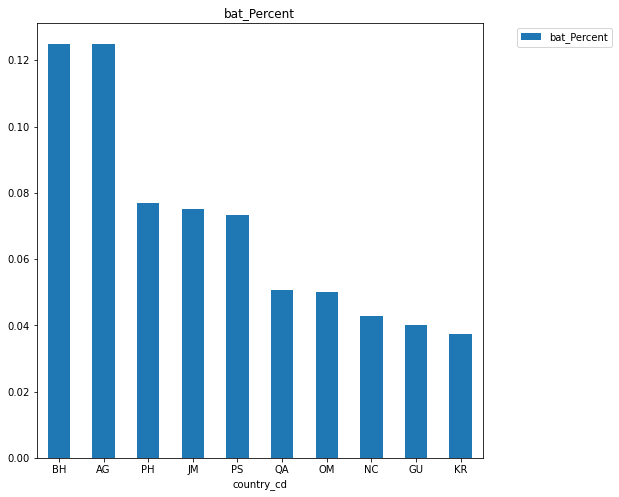

In [438]:
#PLOT THE COUNTRIES BASED ON BATTERY PERCENTAGE BELOW

bat_plot = top_bat['bat_Percent'].plot.bar(rot=0, subplots=True, figsize = (8,8) )
bat_plot[0].legend(bbox_to_anchor=(1.3, 1))

In [439]:
#IN THE ABOVE I NOTICED THAT IT IS HARD TO COMPARE COUNTRIES DUE TO SOME COUNTRIES HAVING A MUCH SMALLER SAMPLE SIZE
#THAN OTHER COUNTRIES
#THEREFORE, I WILL NOW GO BACK TO COMPARING THE REGIONS

outcome_count_region = df.groupby(['region', 'outcome']).size().unstack(fill_value=0)
outcome_count_region['total'] = outcome_count_region.sum(axis=1)

fields = ['bat','cncl','ok', 'stuck']

for i in fields:
    outcome_count_region['{}_Percent'.format(i)] = outcome_count_region[i] / outcome_count_region['total']

outcome_count_region = outcome_count_region.drop(['bat','cncl','ok','stuck','total'], axis = 1)

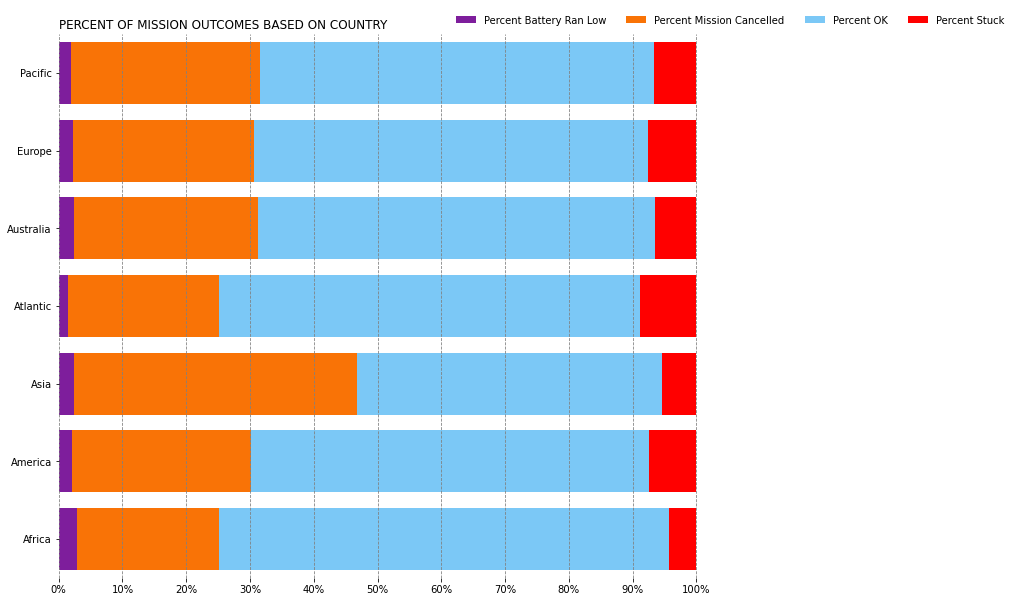

In [385]:

labels = ['Percent Battery Ran Low', 'Percent Mission Cancelled', 'Percent OK', 'Percent Stuck']
colors = ['#7e1e9c', '#F97306', '#7BC8F6','red']

title = 'PERCENT OF MISSION OUTCOMES BASED ON COUNTRY'

plot_stackedbar(outcome_count_region, labels, colors, title)


In [ ]:
#AS WE SEE ABOVE, ASIA HAS A LOT OF THEIR ROBOT MISSIONS CANCELLED
#AS SEEN EARLIER, ASIA ALSO HAS THE HIGHEST CHARGE TIME AND PAUSE TIME. HOWEVER, ASIA DOESN'T HAVE A GREATER 
#AMOUNT OF MISSIONS WHERE THE ROBOT BATTERY RUNS LOW
#THIS MAY INDICATE THAT USERS IN ASIA MAY BE PAUSING THEIR ROBOTS TO BRING THEM BACK TO FULL CHARGE BEFORE FINISHING 
#A MISSION
#OR IT MAY INDICATE THAT IN ASIA, ROBOTS HAVE A SMALLER AREA TO CLEAN, RESULTING IN MORE CHARGE TIME AND LESS CLEANING TIME

TASK 2 : DATA LOSS


In [442]:
#CHECK THE DATA FOR MISSING/NULL VALUES

df.isna().sum()

#As seen below, there are 72 robots with missing country code data
#We will investigate this

country_cd    72
robotid        0
datetime       0
nmssn          0
outcome        0
region         0
city           0
dtype: int64

In [476]:
df_grouped = df.groupby('region').count()
df_grouped.sort_values('robotid', ascending = False)

#See in table below that the number of robots (robotid) does not match the number of country codes in Africa and Europe

,country_cd,robotid,datetime,nmssn,outcome,city
region,,,,,,
Asia,263898,263898,263898,263898,263898,263898
Europe,77661,77708,77708,77708,77708,77708
America,21630,21630,21630,21630,21630,21630
Australia,3100,3100,3100,3100,3100,3100
Pacific,726,726,726,726,726,726
Atlantic,478,478,478,478,478,478
Africa,114,139,139,139,139,139


In [477]:
difference = df_grouped['robotid'] - df_grouped['country_cd']
difference.sort_values(ascending = False)

#There are 47 robots not reporting country code data in Europe 
#There are 25 robots not reporting country code data in Africa

region
Europe       47
Africa       25
Pacific       0
Australia     0
Atlantic      0
Asia          0
America       0
dtype: int64

In [478]:
#IT IS POSSIBLE THAT IT IS A DEFECT WITH SPECIFIC ROBOT MODELS
#I AM GROUPING THE MISSING DATA BY ROBOTID

is_NaN = df.isnull()
rows_w_NaN = is_NaN.any(axis=1)
rows_missing = df[rows_w_NaN]
rows_missing.groupby('robotid').count()

#AS SEEN BELOW, IT IS IN FACT THE CASE. THERE ARE 2 ROBOTS THAT ARE NOT REPORTING (OR INCORRECTLY REPORTING)
#COUNTRY_ID DATA. THIS IS LIKELY A DEFECT WITH THESE 2 ROBOTS. PROBLEM SOLVED.

,country_cd,datetime,nmssn,outcome,region,city
robotid,,,,,,
QMJXZLREE88GULA1,0,47,47,47,47,47
Z9JJM7JRIGJYLER2,0,25,25,25,25,25
